In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
# Scale the data (excluding the index)
scaled_data = scaler.fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index


# Display the scaled DataFrame
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data using `df_scaled`
    kmeans_model.fit(df_scaled)
    
    # Append the model's inertia to the inertia list
    inertia.append(kmeans_model.inertia_)

In [10]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for KMeans Clustering',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [13]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [15]:
# Create a copy of the scaled DataFrame
df_scaled_predictions = df_scaled.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

df_scaled_predictions['Cluster'] = clusters
# Display the copy of the scaled DataFrame
df_scaled_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["Cluster"],
    title="Cryptocurrency Clustering",
    width=800,
    height=400
)
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)

# View the scaled PCA data
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [20]:
# Retrieve the explained variance to determine how much information
explained_variance = pca.explained_variance_ratio_
# can be attributed to each principal component.
# Calculate the total explained variance
total_explained_variance = sum(explained_variance)
print(f"Total Explained Variance of the three principal components: {total_explained_variance:.2f}")


Total Explained Variance of the three principal components: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.90

In [21]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11

k_values_pca = list(range(1, 12))


In [23]:

# Create an empty list to store the inertia values for PCA
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans_model_pca.fit(df_pca)
    
    # Append the model's inertia to the inertia list
    inertia_pca.append(kmeans_model_pca.inertia_)


In [24]:
# Create a dictionary with the data to plot the Elbow curve for PCA
elbow_data_pca = {
    'k': k_values_pca,
    'inertia': inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve for PCA
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for KMeans Clustering (PCA Data)',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)

# Display the elbow plot
elbow_plot_pca


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** yes, it appears much clearer that k=4 is the optimal number

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model_final = KMeans(n_clusters=best_k, random_state=0)

In [27]:
# Fit the K-Means model using the PCA data
kmeans_model_final.fit(df_pca)

KMeans(n_clusters=4, random_state=0)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans_model_final.predict(df_pca)

# Print the resulting array of cluster values
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [29]:
# Create a copy of the scaled PCA DataFrame
df_pca_predictions = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_predictions['Cluster'] = clusters

# Display the copy of the scaled PCA DataFrame
print(df_pca_predictions)

                           PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        2
ethereum             -0.458261  0.458466  0.952877        2
tether               -0.433070 -0.168126 -0.641752        0
ripple               -0.471835 -0.222660 -0.479053        0
bitcoin-cash         -1.157800  2.041209  1.859715        2
binancecoin          -0.516534  1.388377  0.804071        2
chainlink            -0.450711  0.517699  2.846143        2
cardano              -0.345600  0.729439  1.478013        2
litecoin             -0.649468  0.432165  0.600303        2
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        0
crypto-com-chain     -0.248198 -1.376252 -1.462026        0
usd-coin             -0.438408 -0.175337 -0.663388        0
eos                  -0.693425 -0.473815 -0.527597        0
monero                0.060499  2.909404  1.498571        2
tron                 -0.393352 -0.108192

In [30]:
# Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_predictions.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='K-Means Clustering of Cryptocurrencies (PCA)',
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

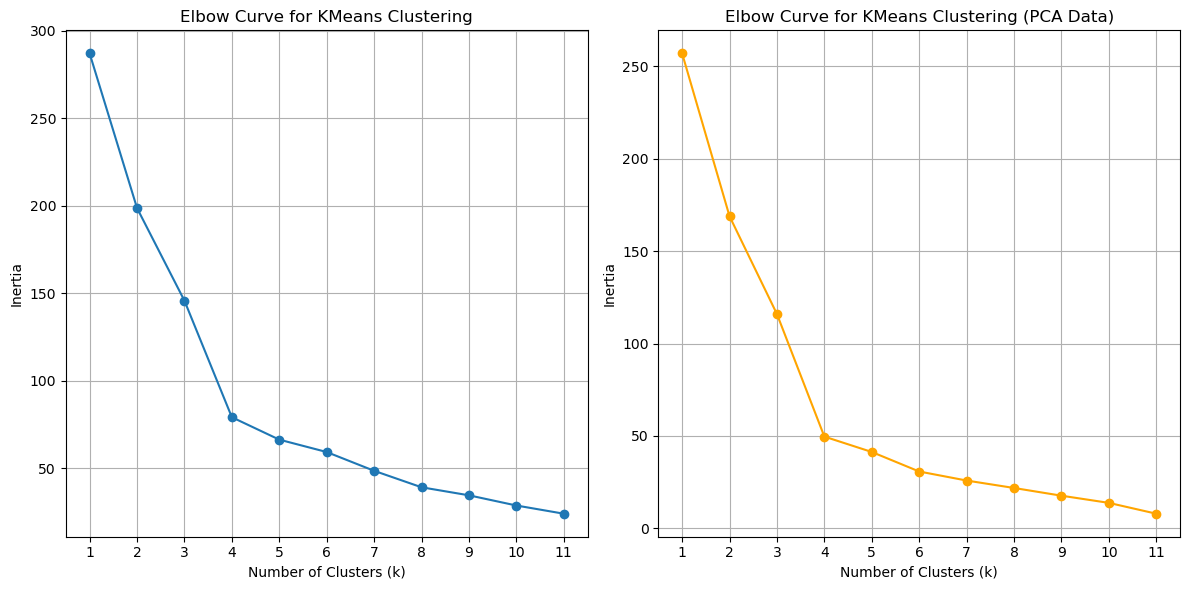

In [31]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Create a composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot the Elbow curve for the scaled data
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid()

# Plot the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', color='orange')
plt.title('Elbow Curve for KMeans Clustering (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_pca['k'])
plt.grid()

# Show the composite plot
plt.tight_layout()
plt.show()

In [35]:
import matplotlib.pyplot as plt
import hvplot.pandas

# Create the scatter plot for the original scaled data
original_plot = df_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["Cluster"],
    title="Cryptocurrency Clustering (Original Data)"
).opts(show_grid=True)

# Create the scatter plot for the PCA data
pca_plot = df_pca_predictions.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='K-Means Clustering of Cryptocurrencies (PCA)'
).opts(show_grid=True)

# Combine the plots using HoloViews
combined_plot = (original_plot + pca_plot).cols(1)

# Show the composite plot
combined_plot


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  * Using fewer features to cluster data with K-Means can have several impacts, both positive and negative:
Positive Impacts:

    Simplified Model: Reducing the number of features can simplify the model, making it easier to interpret and understand the clustering results. This can help in identifying the main drivers of the clusters.

    Improved Performance: With fewer features, the K-Means algorithm may run faster and require less computational power, especially with large datasets. This can lead to quicker iterations and analysis.

    Reduced Noise: By eliminating less relevant features, you may reduce noise in the data, which can lead to clearer and more distinct clusters. This helps in focusing on the most significant variables that contribute to the clustering.

    Better Visualization: Fewer dimensions allow for easier visualization of the clusters. It becomes simpler to plot and analyze the relationships between clusters when working with 2D or 3D representations.

Negative Impacts:

    Loss of Information: Reducing features may lead to the loss of important information that could be crucial for accurately defining clusters. This can result in less meaningful or less accurate clustering.

    Over-Simplification: In some cases, oversimplifying the model by removing too many features can lead to the creation of clusters that do not adequately represent the underlying data structure. This could mask important patterns or relationships.

    Suboptimal Clustering: If the removed features contained significant variance or patterns relevant to the clustering task, the resulting clusters might not capture the true structure of the data, leading to inaccurate insights.
